# Feature Engineering commodity prices

## coal price

In [1]:
import sys
import os

# Add the 'main' directory to sys.path
main_dir = os.path.dirname(os.path.dirname(__file__))  # Path to the 'main' directory
sys.path.append(main_dir)

from preproc.data import clean_data_coal, clean_data_gas, clean_data_oil
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


ImportError: cannot import name 'clean_data_coal' from 'data' (unknown location)

In [ ]:
coal_price_df = clean_data_coal()
coal_price_df


Loaded coal_price.csv successfully.


,Date,coal_adj_close
0,2023-11-22,122.75
1,2023-11-21,122.40
2,2023-11-20,121.75
3,2023-11-17,121.75
4,2023-11-16,122.50
...,...,...
1207,2019-02-07,76.75
1208,2019-02-06,79.30
1209,2019-02-05,77.70
1210,2019-02-04,79.60


In [ ]:
coal_price_df.shape


(1212, 2)

In [ ]:
coal_price_df.size


2424

In [ ]:
coal_price_df.dtypes


Date              datetime64[ns]
coal_adj_close           float64
dtype: object

In [ ]:
coal_price_df.isnull().sum()


Date              0
coal_adj_close    0
dtype: int64

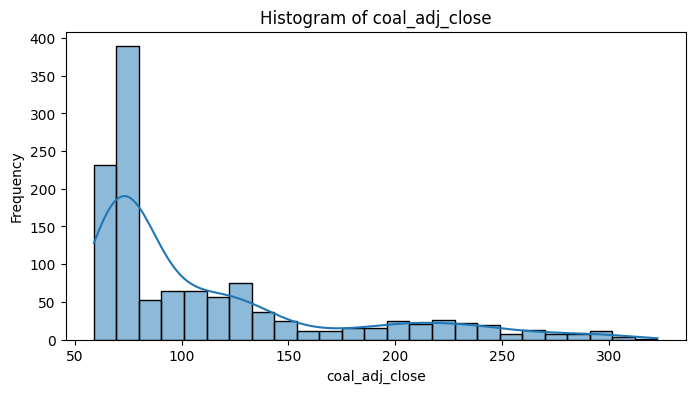

In [ ]:
for column in coal_price_df.columns:
    if coal_price_df[column].dtype in ['int64', 'float64']:  # Numeric columns
        plt.figure(figsize=(8, 4))
        sns.histplot(coal_price_df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


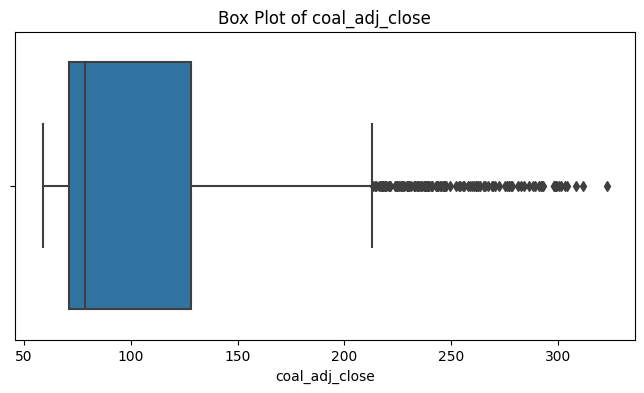

In [ ]:
for column in coal_price_df.columns:
    if coal_price_df[column].dtype in ['int64', 'float64']:  # Numeric columns
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=coal_price_df[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()


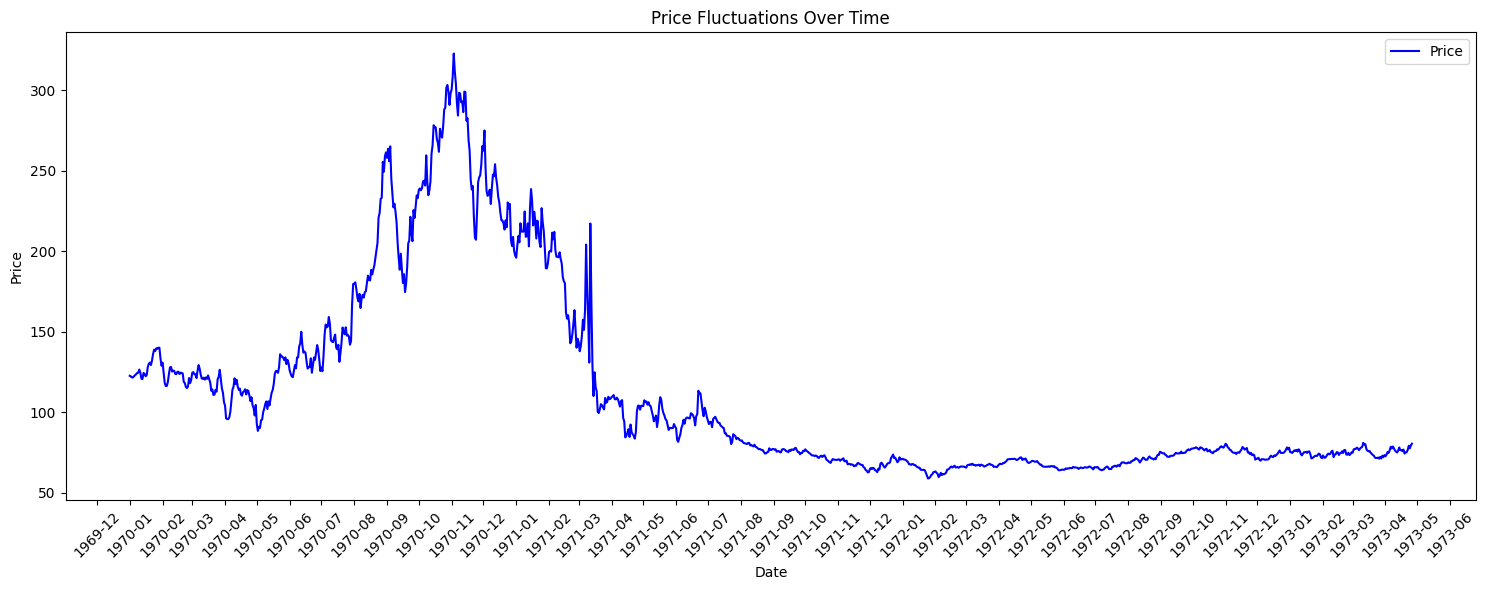

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting the raw price data
plt.figure(figsize=(15, 6))
plt.plot(coal_price_df.index, coal_price_df['coal_adj_close'], label='Price', color='blue')  # Ensure using the index for x-axis

# Formatting the x-axis to show months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Formatting as Year-Month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # Setting major ticks to months

# Other plot settings
plt.title('Price Fluctuations Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Convert 'Date' to datetime with UTC timezone and add 00:00:00
coal_price_df['Date'] = pd.to_datetime(coal_price_df['Date']).dt.tz_localize('UTC')

# Set 'Date' as the index
coal_price_df.set_index('Date', inplace=True)


In [ ]:
coal_price_df


,coal_adj_close
Date,
2023-11-22 00:00:00+00:00,122.75
2023-11-21 00:00:00+00:00,122.40
2023-11-20 00:00:00+00:00,121.75
2023-11-17 00:00:00+00:00,121.75
2023-11-16 00:00:00+00:00,122.50
...,...
2019-02-07 00:00:00+00:00,76.75
2019-02-06 00:00:00+00:00,79.30
2019-02-05 00:00:00+00:00,77.70


In [ ]:
scaler = MinMaxScaler()

# Reshaping the column to the format expected by MinMaxScaler (2D array)
coal_price_scaled = scaler.fit_transform(coal_price_df[['coal_adj_close']])

# Replace the original column with the scaled values
coal_price_df['coal_adj_close'] = coal_price_scaled


In [ ]:
coal_price_df


,coal_adj_close
Date,
2023-11-22 00:00:00+00:00,0.241758
2023-11-21 00:00:00+00:00,0.240432
2023-11-20 00:00:00+00:00,0.237969
2023-11-17 00:00:00+00:00,0.237969
2023-11-16 00:00:00+00:00,0.240811
...,...
2019-02-07 00:00:00+00:00,0.067450
2019-02-06 00:00:00+00:00,0.077113
2019-02-05 00:00:00+00:00,0.071050


In [2]:
oil_price_df = clean_oil_coal()
oil_price_df


NameError: name 'clean_oil_coal' is not defined

In [3]:
gas_price_df = clean_gas_coal()
gas_price_df


NameError: name 'clean_gas_coal' is not defined